<a href="https://colab.research.google.com/github/Eldhosee/Sentiment-analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk


In [2]:
pip install unidecode


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.5 MB/s eta 0:00:00


In [3]:
import unidecode


In [4]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [21]:
data = pd.read_excel('user_review.xls')
print(data.head(10))

   id                                             review
0   1  I love this app! It is so useful and easy to use.
1   2  Terrible experience. The app crashes all the t...
2   3        Decent app but needs improvement in the UI.
3   4           Fantastic! This app has changed my life.
4   5       The app is okay, but it lacks many features.
5   6                Worst app ever. It is full of bugs.
6   7  Excellent functionality and user-friendly design.
7   8  Not bad, but there are better alternatives out...
8   9  I'm very satisfied with this app. Highly recom...
9  10         The app is slow and unresponsive at times.


In [22]:
data.dropna(inplace=True)

In [23]:
import re

In [24]:
def preprocess_text(text):
    text = unidecode.unidecode(text)
    text = text.lower()
    text =  re.sub(r'[^\w\s]', '', text)
    return text

In [25]:
data['review'] = data['review'].apply(preprocess_text)
print(data['review'])

0       i love this app it is so useful and easy to use
1      terrible experience the app crashes all the time
2            decent app but needs improvement in the ui
3                fantastic this app has changed my life
4            the app is okay but it lacks many features
5                     worst app ever it is full of bugs
6       excellent functionality and userfriendly design
7     not bad but there are better alternatives out ...
8     im very satisfied with this app highly recomme...
9             the app is slow and unresponsive at times
10               good app but it could use some updates
11    i had a bad experience the customer support is...
12             amazing app very intuitive and efficient
13                   its an average app nothing special
14     ive been using this app for months and i love it
15       disappointed the app doesnt work as advertised
16      pretty good app but theres room for improvement
17               i wouldnt recommend this app to

In [26]:
sid = SentimentIntensityAnalyzer()

In [27]:
def analyze_sentiment(review):
    score = sid.polarity_scores(review)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [30]:
data['sentiment'] = data['review'].apply(analyze_sentiment)
print(data['sentiment'])
sentiment_counts = data['sentiment'].value_counts()

0     Positive
1     Negative
2     Positive
3     Positive
4     Positive
5     Negative
6     Positive
7     Positive
8     Positive
9      Neutral
10    Positive
11    Negative
12    Positive
13    Negative
14    Positive
15    Negative
16    Positive
17    Negative
18    Positive
19    Positive
20     Neutral
21    Negative
22    Positive
23    Positive
24    Positive
25     Neutral
26    Negative
27    Positive
28    Negative
29    Positive
30     Neutral
31    Positive
32     Neutral
33     Neutral
34    Positive
35     Neutral
36    Positive
37     Neutral
38    Positive
39    Positive
40    Positive
41     Neutral
42     Neutral
43    Positive
44     Neutral
45    Positive
46     Neutral
47    Positive
48     Neutral
49     Neutral
Name: sentiment, dtype: object


In [31]:
summary_report = f"""
Summary Report:
Total Reviews: {len(data)}
Positive Reviews: {sentiment_counts.get('Positive', 0)}
Negative Reviews: {sentiment_counts.get('Negative', 0)}
Neutral Reviews: {sentiment_counts.get('Neutral', 0)}
"""
print(summary_report)


Summary Report:
Total Reviews: 50
Positive Reviews: 27
Negative Reviews: 9
Neutral Reviews: 14



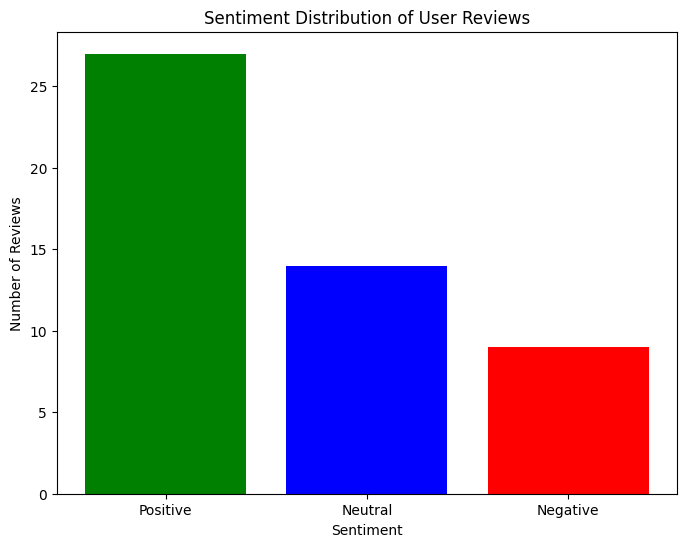

In [32]:
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Distribution of User Reviews')
plt.show()

In [33]:
with open('summary_report.md', 'w') as file:
    file.write(summary_report)